### **Loading a CSV file and standardizing date formats for analysis in SQL.**

In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('data.csv', encoding='cp1252')
df.head(10)

def fix_date(date_str):
  if pd.isna(date_str):
    return None

  s = str(date_str).strip()
  s = s.split('+')[0].split(',')[0]

  # List of possible date/time formats
  formats = [
      "%d-%m-%Y", "%m-%d-%Y", "%Y-%m-%d", "%d/%m/%Y", "%m/%d/%Y",
      "%d-%m-%Y %H:%M", "%d-%m-%Y %H:%M:%S",
      "%m-%d-%Y %H:%M", "%m-%d-%Y %H:%M:%S",
      "%Y-%m-%d %H:%M", "%Y-%m-%d %H:%M:%S",
      "%d/%m/%Y %H:%M", "%d/%m/%Y %H:%M:%S",
      "%m/%d/%Y %H:%M", "%m/%d/%Y %H:%M:%S",
      "%d-%b-%Y", "%d-%b-%Y %H:%M:%S", "%d-%b-%Y %H:%M",
      "%d/%b/%Y", "%d/%b/%Y %H:%M:%S", "%d/%b/%Y %H:%M",
      "%d-%m-%y", "%m-%d-%y", "%Y-%m-%d %H:%M:%S",
      "%d-%m-%y %H:%M:%S", "%m-%d-%y %H:%M:%S"
    ]

  for fmt in formats:
    try:
      date_obj = datetime.strptime(s, fmt)
      return date_obj.strftime("%Y-%m-%d %H:%M:%S")
    except ValueError:
      continue

  return None

df['InvoiceDate'] = df['InvoiceDate'].apply(fix_date)

# Getting the Invalid date format counts for debugging
invalid_count = df['InvoiceDate'].isna().sum()
print(f"⚠️ {invalid_count} unrecognized date/time values out of {len(df)} rows.")


In [ ]:

df['CustomerID'] = df['CustomerID'].fillna('NULL')

In [ ]:
print(df['CustomerID'].isna().sum())

In [ ]:
print(df['InvoiceDate'].head(10))

In [ ]:
# downloading the file to analyze further in SQL
output_file = "data_clean.csv"
df.to_csv(output_file, index=False)
files.download(output_file)

print("✅ Done! Dates and times standardized (YYYY-MM-DD HH:MM:SS).")

# **Working On our main Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_enriched.csv to sales_data_enriched.csv


In [ ]:
# Importing Fundamental Libraries for Data Analysis
import pandas as pd
import numpy as np

In [ ]:
retail_df = pd.read_csv('sales_data_enriched.csv')
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Discount,Profit,ProfitMargin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.300000,0.069109,11.993685,0.783901
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.340001,0.073169,16.932099,0.832453
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.000000,0.068228,15.653057,0.711503
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.340001,0.187804,14.776401,0.726470
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.340001,0.254237,17.276945,0.849407
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.0,United Kingdom,15.300000,0.190254,12.247777,0.800508
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-01-2010 08:26,4.25,17850.0,United Kingdom,25.500000,0.126697,19.507279,0.764991
7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,United Kingdom,11.100000,0.244953,8.660896,0.780261
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.0,United Kingdom,11.100000,0.063837,9.879381,0.890034
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.69,13047.0,United Kingdom,54.080002,0.058319,45.335448,0.838303


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541908 entries, 0 to 541907
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541908 non-null  object        
 1   StockCode     541908 non-null  object        
 2   Description   540454 non-null  object        
 3   Quantity      541908 non-null  int64         
 4   InvoiceDate   541908 non-null  datetime64[ns]
 5   UnitPrice     541908 non-null  float64       
 6   CustomerID    541908 non-null  int64         
 7   Country       541908 non-null  object        
 8   TotalSales    541908 non-null  float64       
 9   Discount      541908 non-null  float64       
 10  Profit        541908 non-null  float64       
 11  ProfitMargin  541908 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.6+ MB


##### **Data Cleaning — Correcting Data Types and Removing Duplicates**

In [ ]:
# Handle missing CustomerID
missing = retail_df['CustomerID'].isna()
max_id = int(retail_df['CustomerID'].max())
retail_df.loc[missing, 'CustomerID'] = np.arange(max_id + 1, max_id + 1 + missing.sum())

In [ ]:
retail_df['CustomerID'].nunique()

139451

In [ ]:
# Correcting the data type
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='mixed', dayfirst=True)

In [ ]:
# dropping potential duplicates if any exists
retail_df.drop_duplicates(inplace=True)

In [ ]:
# Extract datetime features
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Day'] = retail_df['InvoiceDate'].dt.day
retail_df['WeekDay'] = retail_df['InvoiceDate'].dt.day_name()
retail_df['Hour'] = retail_df['InvoiceDate'].dt.hour


In [ ]:
retail_df = retail_df[(retail_df['Quantity'] > 0) & (retail_df['UnitPrice'] > 0)]

In [ ]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Discount,Profit,ProfitMargin,Month,Day,WeekDay,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.300000,0.069109,11.993685,0.783901,1,12,Tuesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.340001,0.073169,16.932099,0.832453,1,12,Tuesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.000000,0.068228,15.653057,0.711503,1,12,Tuesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.340001,0.187804,14.776401,0.726470,1,12,Tuesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.340001,0.254237,17.276945,0.849407,1,12,Tuesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541903,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France,10.200000,0.160543,8.264404,0.810236,9,12,Monday,12
541904,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France,12.599999,0.167192,9.870001,0.783333,9,12,Monday,12
541905,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France,16.600000,0.281757,13.134166,0.791215,9,12,Monday,12
541906,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France,16.600000,0.148655,15.489132,0.933080,9,12,Monday,12


In [ ]:
print("\n✅ Data Cleaning Completed!")
print("Remaining rows:", len(retail_df))


✅ Data Cleaning Completed!
Remaining rows: 530099


##### **Machine Learning in Action**

In [ ]:
# Importing Essential Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

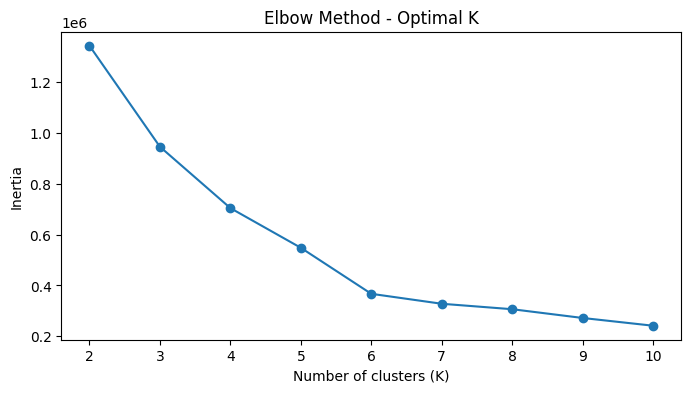

✅ Clustering Completed!

--- Cluster Summary ---
         TotalSales     Profit  ProfitMargin  Discount
Cluster                                               
0             19.46      14.72          0.76      0.22
1         168469.59  134007.42          0.80      0.28
2             20.35      16.80          0.83      0.10
3             19.50      17.37          0.89      0.22


In [ ]:
features = ['TotalSales', 'Profit', 'ProfitMargin', 'Discount']
X = retail_df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()

# 8️⃣ Apply K-Means Clustering (let’s pick K=4 as a starting point)
kmeans = KMeans(n_clusters=4, random_state=42)
retail_df['Cluster'] = kmeans.fit_predict(X_scaled)
print("✅ Clustering Completed!")

# 9️⃣ Analyze Cluster Profiles
cluster_summary = retail_df.groupby('Cluster')[features].mean().round(2)
print("\n--- Cluster Summary ---")
print(cluster_summary)

